The dataset has two columns - age (age of the person/customer) and bought_insurance (whether the customer bought insurance or not). If bought_insurance = 1, the customer bought insurance and if bought_insurance = 0, the customer did not buy the insurance.


In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


What is the dataset?

In [79]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [80]:
print("Classification classes in the dataset : " , np.unique(df['bought_insurance']))

Classification classes in the dataset :  [0 1]


Visualizing the model

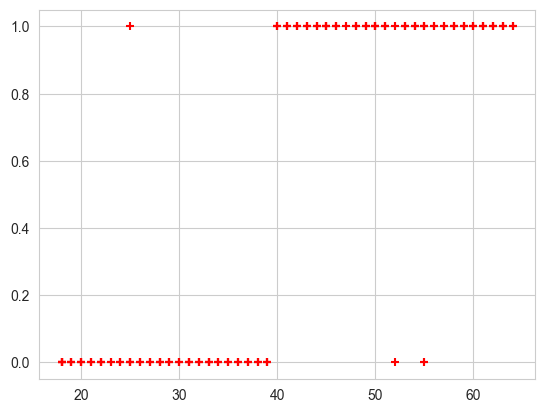

In [81]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='red')

In [82]:
X = df[['age']]     # input variable
y = df['bought_insurance']    # output variable

In [83]:
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (196, 1) Dimension:  2
Shape:  (196,) Dimension:  1


Splitting the dataset into train and test

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

Building up the model

In [86]:
from sklearn.linear_model import LogisticRegression 
log_r = LogisticRegression() 
log_r.fit(X_train , y_train)

LogisticRegression()

In [ ]:
y_pred = log_r.predict(X_test)

0      0
1      0
2      1
3      0
4      1
      ..
191    1
192    0
193    1
194    0
195    1
Name: bought_insurance, Length: 196, dtype: int64

In [ ]:
coeff = log_r.coef_
b = log_r.intercept_

array([-14.53858557])

In [ ]:
x_in = X_test
y_val = coeff*x_in + b

(-1.0, 2.0)

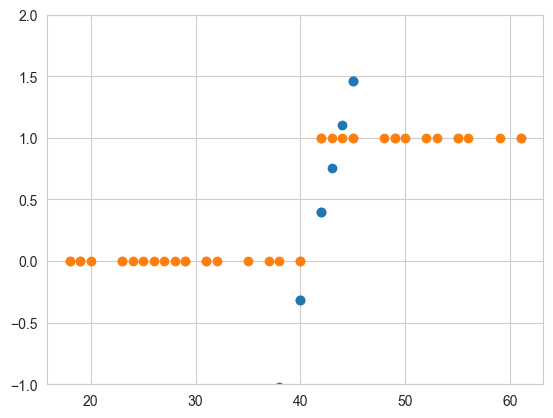

In [117]:
plt.scatter(x_in , y_val)
plt.scatter(X_test , y_pred)
plt.ylim(-1,2)

In [123]:
print("Predict when age is 63" , log_r.predict([[63]]))

print("Predict when age is 40" , log_r.predict([[40]]))

Predict when age is 63 [1]
Predict when age is 40 [0]


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Performance

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 3, 18]])

In [133]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
total_samples = len(y_test)
tn_percent = (tn / total_samples) * 100
fp_percent = (fp / total_samples) * 100
fn_percent = (fn / total_samples) * 100
tp_percent = (tp / total_samples) * 100
print(f"True Negative is: {tn_percent:.2f}%")
print(f"False Positive is: {fp_percent:.2f}%")
print(f"False Negative is: {fn_percent:.2f}%")
print(f"True Positive is: {tp_percent:.2f}%")

True Negative is: 47.50%
False Positive is: 0.00%
False Negative is: 7.50%
True Positive is: 45.00%


In [137]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy of model is: " , acc ,"%")

Accuracy of model is:  92.5 %


In [140]:
from sklearn.metrics import precision_score,recall_score
print("Precision " , precision_score(y_test,y_pred,average=None))

Precision  [0.86363636 1.        ]
